# Convective mixing due to unstable initial conditions via CVMix

This notebook shows results from a test cases where convection occurs due to a initially unstable water column.

In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


## Initial Conditions 

The initial water column is unstable near the surface: $\frac{\partial \theta_1}{\partial z} = -0.01$; $\frac{\partial \theta_2}{\partial z} = 0.01$; salt(z) = 35.

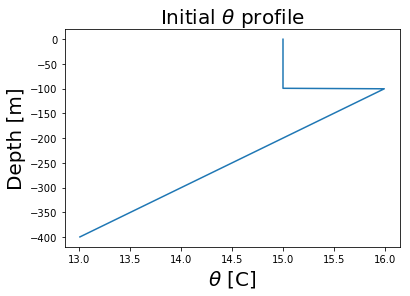

In [2]:
temp_ic = Dataset('MOM_IC.nc').variables['Temp'][0,:,1,1]
z = Dataset('MOM_IC.nc').variables['Layer'][:]
plt.figure()
plt.plot(temp_ic,-z); plt.title(r'Initial $\theta$ profile', fontsize=20)
plt.xlabel(r'$\theta$ [C]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20)

## Potential temperature ($\theta$) drift

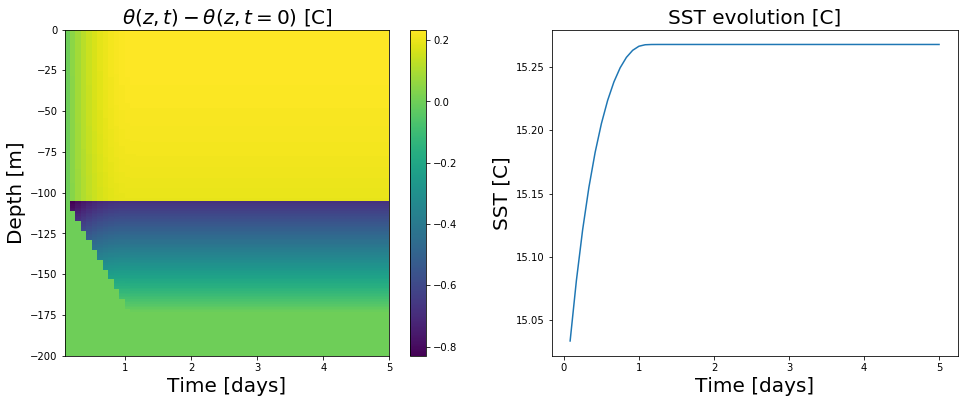

In [3]:
time = Dataset('prog_z.nc').variables['Time'][:]
temp =  Dataset('prog_z.nc').variables['temp'][:,:,1,1]
temp_drift  = temp-temp[0,:]

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.pcolormesh(time, -z, temp_drift.T)
plt.colorbar(); plt.title(r'$\theta(z,t) - \theta(z,t=0)$ [C]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])
plt.subplot(122)
plt.plot(time, temp[:,0])
plt.title('SST evolution [C]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('SST [C]', fontsize=20)

## Vertical viscosities ($\kappa_v$) and diffusivities ($\kappa_d$)

(-200, 0)

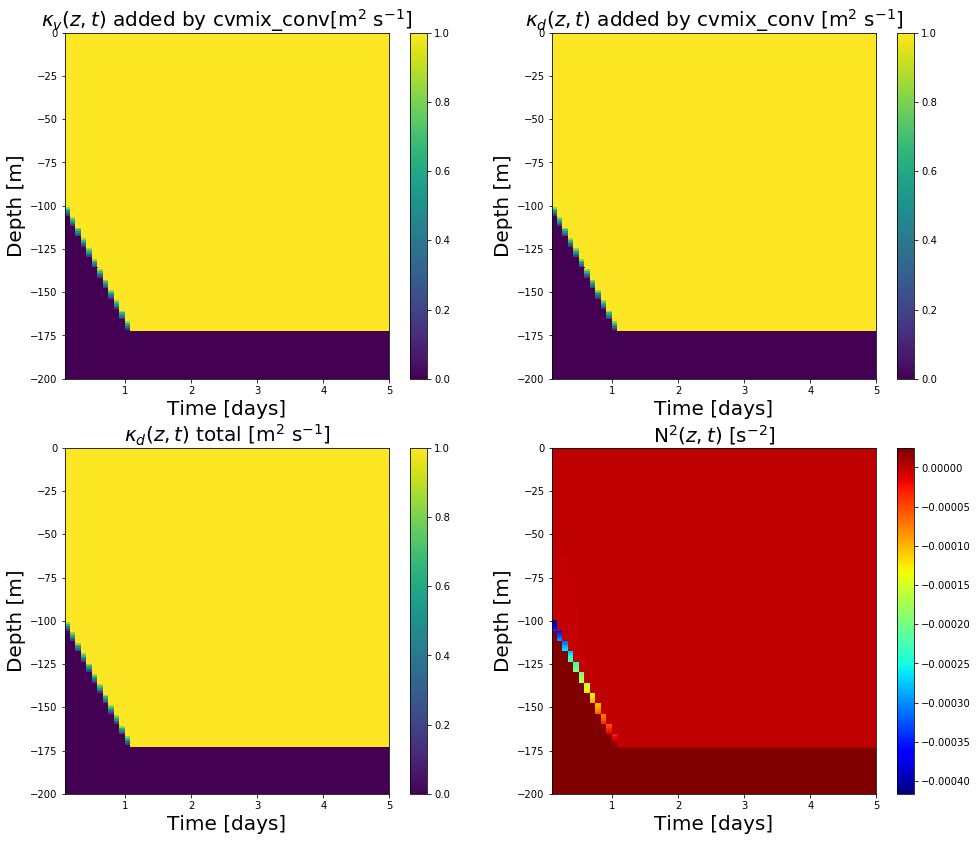

In [9]:
kv =  Dataset('visc.nc').variables['conv_kv'][:,:,1,1]
kd =  Dataset('visc.nc').variables['conv_kd'][:,:,1,1]
n2 =  Dataset('visc.nc').variables['conv_N2'][:,:,1,1]
kd_int =  Dataset('visc.nc').variables['Kd_interface'][:,:,1,1]
zi =  Dataset('visc.nc').variables['zi'][:]

plt.figure(figsize=(16,14))
plt.subplot(221)
plt.pcolormesh(time, -zi, kv.T)
plt.colorbar(); plt.title(r'$\kappa_v(z,t)$ added by cvmix_conv[m$^2$ s$^{-1}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

plt.subplot(222)
plt.pcolormesh(time, -zi, kd.T)
plt.colorbar(); plt.title(r'$\kappa_d(z,t)$ added by cvmix_conv [m$^2$ s$^{-1}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

plt.subplot(223)
plt.pcolormesh(time, -zi, kd_int.T)
plt.colorbar(); plt.title(r'$\kappa_d (z,t)$ total [m$^2$ s$^{-1}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])

plt.subplot(224)
plt.pcolormesh(time, -zi, n2.T, cmap=plt.cm.jet)
plt.colorbar(); plt.title(r'N$^2(z,t)$ [s$^{-2}$]', fontsize=20)
plt.xlabel('Time [days]', fontsize=20); plt.ylabel('Depth [m]', fontsize=20); plt.ylim([-200,0])